In [ ]:
'''
    The butterfly effect is used to describe a system that is sensitively dependent 
on initial conditions (chaos theory).  In other words, the butterfly effect 
is present in a system when the system's starting condition heavily affects the 
final state of the system.  To prove this, the two paths generated from the two 
close initial conditions must grow farther apart from each other as time passes.
Therefore, if the difference in the trajectories between two relatively similar 
starting conditions, results in an exponential increase in the separation between
the two trajectories, then the butterfly effect is present in the system.     
    Because of this effect, being able to predict future states of a system 
becomes difficult due to the variety of errors that can occur in the data.  
In order to minimize the errors that occur, linear least squares are used to 
approximate the final state of the system based on the same initial conditions 
data. 
'''

In [1]:
%pylab inline
from numpy import*

Populating the interactive namespace from numpy and matplotlib


In [2]:
#b is the maximum growth rate
#x is the current mayfly population in year t
#t is the number of years that will be cycled

def plot_mayfly_T(x, b, t):
    tList = []
    xList = []
    for i in range(t):
        x = b*(1 - x)* x
        tList.append(i)
        xList.append(x)
    plot(tList, xList, 'r-', ms = .11)    
    xlabel('Number of Years')
    ylabel('Mayfly Population')
    
    popArray = array(xList)
    return popArray

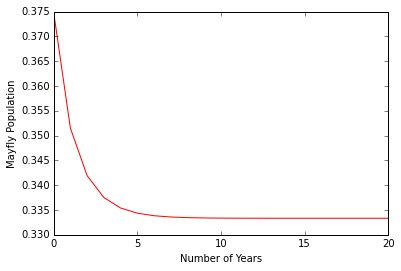

In [3]:
#m0 with b=1.5
m = 0.50000
popM = plot_mayfly_T(m, 1.5, 21)
#print popM

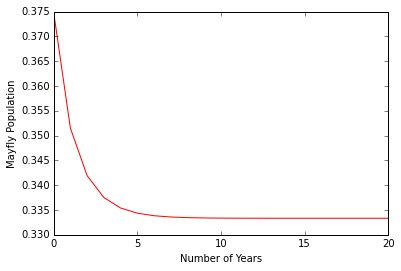

In [4]:
#n0 with b=1.5
n = m+10**-5
popN = plot_mayfly_T(n, 1.5, 21)
#print popN

In [5]:
#popN = plot_mayfly_T(n, 1.5, 101)
#popM = plot_mayfly_T(m, 1.5, 101)

st = [  1.49999957e-10   5.62499491e-11   2.50488519e-11   1.18769439e-11
   5.78898041e-12   2.85849122e-12   1.42036383e-12   7.07989223e-13
   3.53439500e-13   1.76636483e-13   8.82627305e-14   4.41313652e-14
   2.20934382e-14   1.10467191e-14   5.49560397e-15   2.83106871e-15
   1.38777878e-15   7.21644966e-16   3.88578059e-16   1.66533454e-16
   1.11022302e-16]


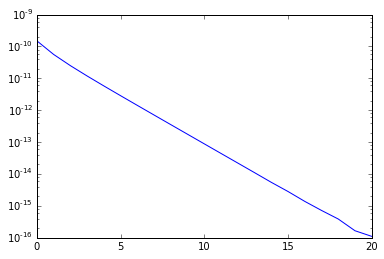

In [6]:
#st is the separation of trajectories logarithmic
st = popM-popN
print "st =",st
t = arange(0,21)
semilogy(t, st)


In [7]:
"""#separation of trajectories exponential

r = (log(st)-log(st[0]))/t
#print "r =",r
#plot(t,r)

s_t = st[0]*exp(B*t)
semilogy(t,s_t, 'y-')
print s_t

#r = polyfit(t,st,0)
#print "r =",r"""

'#separation of trajectories exponential\n\nr = (log(st)-log(st[0]))/t\n#print "r =",r\n#plot(t,r)\n\ns_t = st[0]*exp(B*t)\nsemilogy(t,s_t, \'y-\')\nprint s_t\n\n#r = polyfit(t,st,0)\n#print "r =",r'

In [8]:
#Linear Least Squares
x = t
y = log(st)

print x,'\n',y

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
[-22.62038611 -23.60121598 -24.41019312 -25.15642208 -25.87506494
 -26.58072718 -27.28010806 -27.97634752 -28.67106407 -29.36468254
 -30.05845846 -30.75160564 -31.44349574 -32.13664293 -32.8348279
 -33.49812212 -34.21107193 -34.86499839 -35.4840376  -36.33133546
 -36.73680057]


a = -23.0008742679

B = -0.699377374792

LLSmethod = [  1.02529119e-10   5.09461643e-11   2.53148732e-11   1.25788235e-11
   6.25034929e-12   3.10576473e-12   1.54323768e-12   7.66826449e-13
   3.81031911e-13   1.89332694e-13   9.40783908e-14   4.67470431e-14
   2.32283527e-14   1.15420427e-14   5.73517853e-15   2.84977916e-15
   1.41603984e-15   7.03622531e-16   3.49626227e-16   1.73727379e-16
   8.63241943e-17]


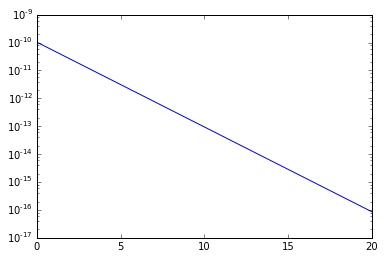

In [9]:
#alpha calculation
a = mean(y) - mean(x)*((mean(x*y) - mean(x)*mean(y))/(mean(x**2) - (mean(x)**2)))
print "a =",a

#beta calculation
B = (mean(x*y) - mean(x)*mean(y))/(mean(x**2) - (mean(x)**2))
print "\nB =",B

#plot of linear least squares
semilogy(t, exp(a+B*t))
print "\nLLSmethod =",exp(a+B*t)

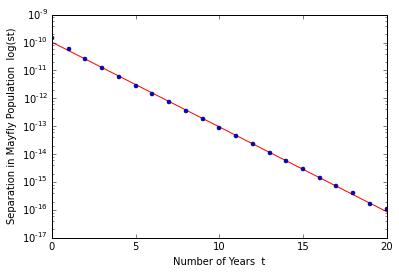

In [10]:
semilogy(t, exp(a+B*t), 'r-')
semilogy(t, st, 'bo', ms=4)
xlabel('Number of Years  t')
ylabel('Separation in Mayfly Population  log(st)')
#semilogy(t,s_t, 'y-')